# Communicate Data Findings - Loan Data from Prosper
## by Abha Ramchandani

## Preliminary Wrangling

> The loan dataset has been provided in a CSV file. It contains 113,937 records and 81 variables about each loan data, including loan amount, borrower rate (or interest rate), current loan status, etc. It also contains those listings which didn't transformed into a loan. There is also information on partially funded loans in the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load dataset and motivate exploration goals!

In [2]:
# Load the data and create it's copy to work on
df = pd.read_csv('prosperLoanData.csv')
df_copy = df.copy()

> Initial data exploration - data characteristics

In [3]:
df_copy.shape

(113937, 81)

In [4]:
df_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

> Some Google search led me to the following links which helped me understand the data and gather the knowledge required to analyze this data.
> - Structure of loan data provided in the [Google Spreadsheet](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)
> - Prosper [data definitions](https://www.prosper.com/Downloads/Services/Documentation/ProsperDataExport_Details.html)
> - Search listing [know-how](https://www.prosper.com/invest/how-to-invest/search-listings/)
> - [Peer-to-peer](https://www.bankrate.com/loans/personal-loans/peer-to-peer-lending-vs-bank-loan/) lending
> - [Prosper loans](https://www.bankrate.com/loans/personal-loans/reviews/prosper/)

### What is the structure of your dataset?

> The dataset provides information about listing, loan and loan status, borrower and lender information and payment details.
> - Most of the columns are numeric, either represent amounts or rates/ratios
> - Date/time columns represent occurrence of a loan event
> - We see some categorical variables, e.g. CreditGrade, ProsperRating, etc.

### What is/are the main feature(s) of interest in your dataset?

> I want to investigate the factors that determine interest rates for loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the following factors affect interest rates.
> - CreditGrade 
> - ProsperRating
> - CreditScoreRangeLower and CreditScoreRangeUpper
> - Prosper Score
> - IncomeRange
> - DebtToIncomeRatio
> - EmploymentStatus and EmploymentStatusDuration

> There may be other contributing factors as well and I may consider them based on my analyses and observations of Univariate Exploration of each factor below.

## Univariate Exploration

> - investigate distributions of individual variables 
> - Clean unusual points or outliers
> - prepare to look at relationships between variables

I will go through each variable - it's info, description, datatype and/or null or relevant values. Clean data where required and create plots + document observations.

In [6]:
base_color = sb.color_palette()[0]
second_color = 'orange'

### Missing Values

> We hust handle the datatypes that we want to investigate for NULL values or incorrect type/category, otherwise we get ValueError / Range Error during plotting.

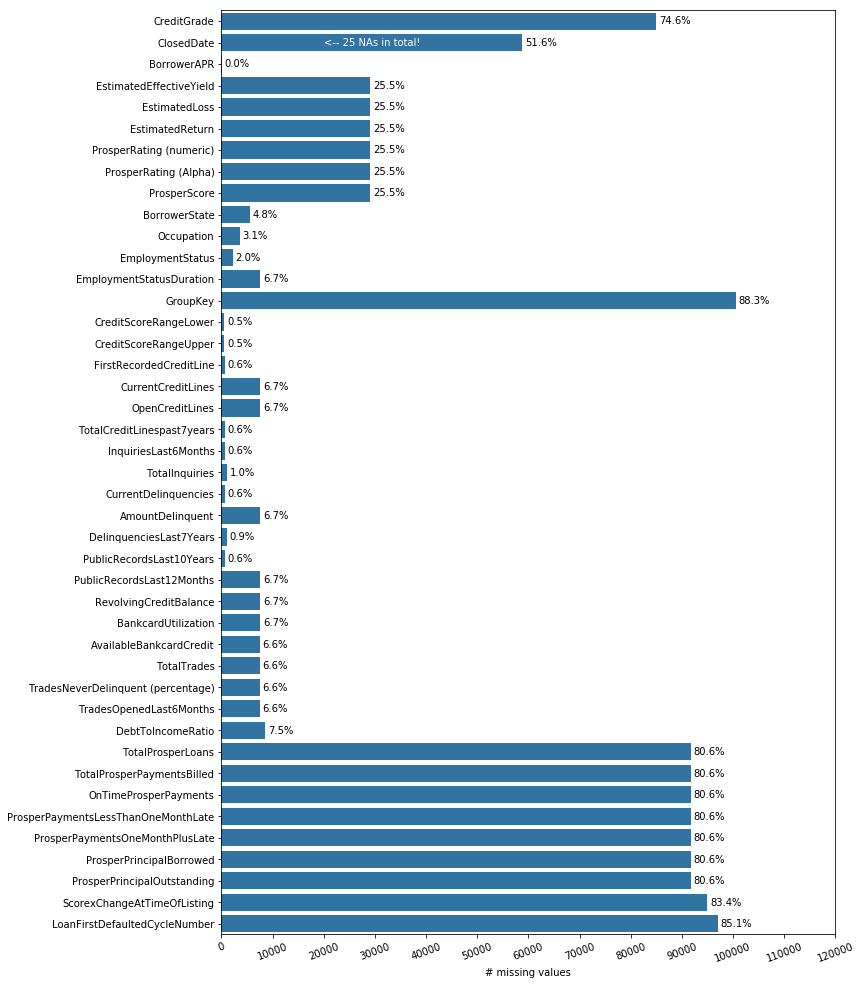

In [7]:
# Plot a horizontal bar chart for missing values
null_counts = df_copy.isnull().sum()
null_counts = null_counts[null_counts>0]
plt.figure(figsize = (11,17))
sb.barplot(x = null_counts, y = np.arange(len(null_counts)), orient = 'h', color = base_color)
plt.xlabel('# missing values')
plt.xticks(np.arange(0,130000,10000), rotation = 20)
plt.yticks(np.arange(len(null_counts)), null_counts.index, rotation = 'horizontal');

# Add UoM %
for i in np.arange(len(null_counts)):
    prop = null_counts[i]/len(df)
    if prop > 0:
        pct_string = '{:0.1f}%'.format(100*prop)
        plt.text(null_counts[i]+500, i, pct_string, va = 'center')    
plt.text(20000, 1, '<-- 25 NAs in total!', va = 'center', color = 'white');

> Handling missing values

> - Occupation: Handle during Univariate analysis, change datatype to categorial
> - EmploymentStatus: Handle during Univariate analysis, change datatype to categorial
> - BorrowerState: Handle during Univariate analysis, change datatype to categorial
> - BorrowerAPR: Handle during Univariate analysis, no change to datatype
> - ProsperRating: applies only after July 2009, could be the reason for so many missing values. Handle during Univariate analysis, no change to datatype
> - ProsperRating (Alpha): Handle during Univariate analysis, no change to datatype
> - ProsperScore: Handle during Univariate analysis, no change to datatype
> - DebtToIncomeRatio: Handle during Univariate analysis, no change to datatype

> Missing closed dates could be because the majority of loans are still running. 

> The columns at the bottom, TotalProspertLoans, TotalProsperPaymentBilled, etc. are aggregations based on historical data. These will be not filled.

### ProsperRating(s) / Prosper Score / CreditGrade

> CreditGrade - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

> ProsperRating (numeric) - The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

> ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

> ProsperScore - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

In [8]:
df_copy['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [9]:
df_copy.CreditGrade.dtype

dtype('O')

> Since CreditGrade is pre 2009, we will exclude it from our analysis.

In [10]:
df_copy['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [11]:
df_copy['ProsperRating (Alpha)'].dtype

dtype('O')

In [12]:
df_copy['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [13]:
df_copy['ProsperRating (numeric)'].dtype

dtype('float64')

In [14]:
df_copy.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [15]:
df_copy.ProsperScore.dtype

dtype('float64')

In [16]:
# Convert 'ProsperRating (Alpha)' and 'CreditGrade' into categorical variables
df_copy['ProsperRating (Alpha)'].fillna('preJul09', inplace=True)
df_copy['ProsperRating (Alpha)'].value_counts()

preJul09    29084
C           18345
B           15581
A           14551
D           14274
E            9795
HR           6935
AA           5372
Name: ProsperRating (Alpha), dtype: int64

In [17]:
df_copy['ProsperRating (Alpha)'] = pd.Categorical(df_copy['ProsperRating (Alpha)'], categories=["AA", "A", "B", "C", "D", "E", "HR", "preJul09"], ordered=True)

In [18]:
df_copy['ProsperRating (Alpha)'].describe()

count       113937
unique           8
top       preJul09
freq         29084
Name: ProsperRating (Alpha), dtype: object

In [19]:
df_copy['CreditGrade'] = pd.Categorical(df_copy['CreditGrade'], categories=["AA", "A", "B", "C", "D", "E", "HR", "NC"], ordered=True)

In [20]:
df_copy['CreditGrade'].describe()

count     28953
unique        8
top           C
freq       5649
Name: CreditGrade, dtype: object

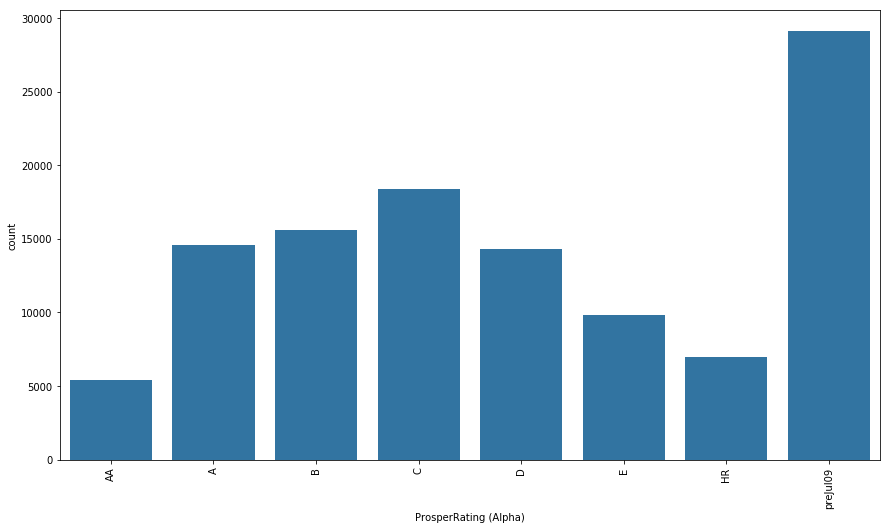

In [21]:
# Plot 'ProsperRating (Alpha)'
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'ProsperRating (Alpha)',color = base_color)
plt.xticks(rotation = 90);

> For further analysis, we can exclude the "preJul09" records. The other rating counts are centred around "C".

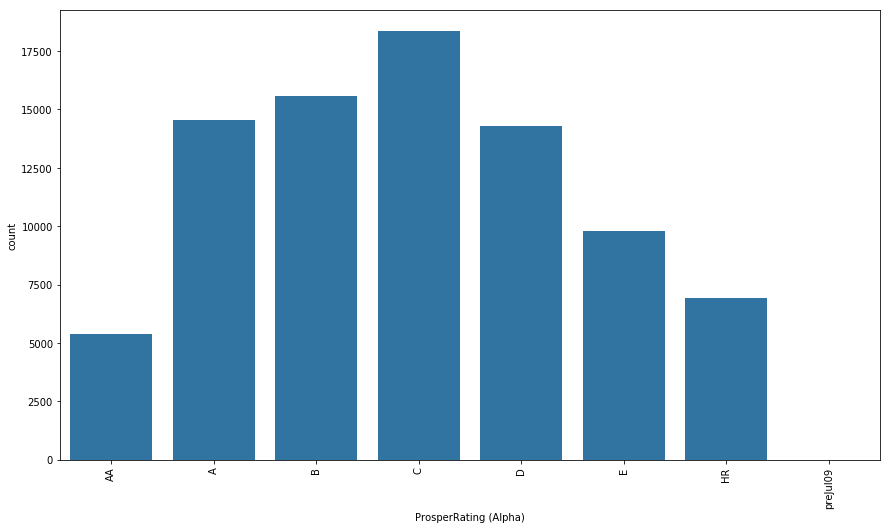

In [22]:
df_copy = df_copy[df_copy['ProsperRating (Alpha)'] != 'preJul09']
# Plot
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'ProsperRating (Alpha)', color = base_color)
plt.xticks(rotation = 90);
df_copy['ProsperRating (Alpha)'] = df_copy['ProsperRating (Alpha)'].cat.remove_categories(['preJul09'])

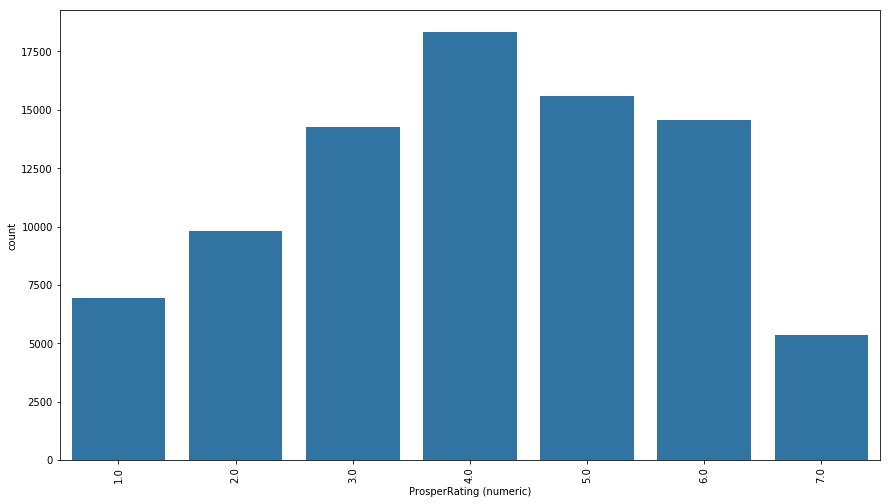

In [23]:
# Plot 'ProsperRating (numeric)'
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'ProsperRating (numeric)',color = base_color)
plt.xticks(rotation = 90);

In [24]:
# ProsperScore
print(df_copy.ProsperScore.nunique(), df_copy.ProsperScore.dtype) 

11 float64


In [25]:
df_copy.ProsperScore.isna().sum()

0

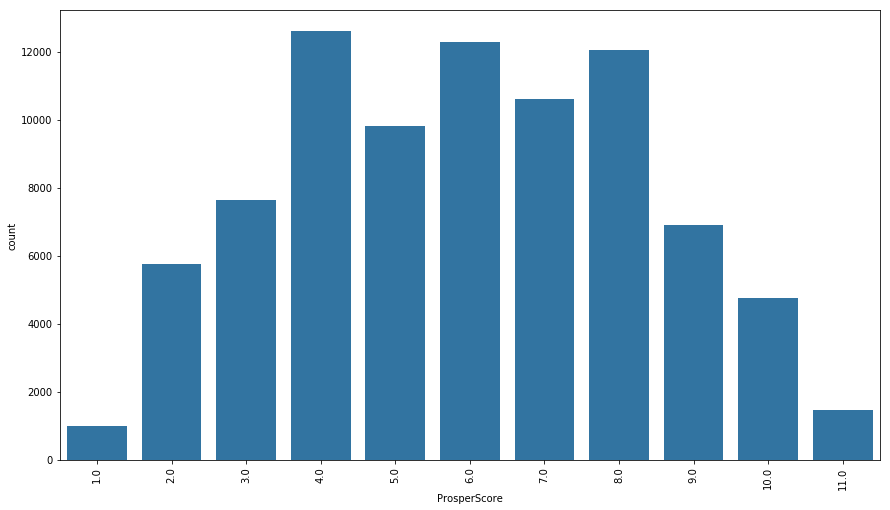

In [26]:
# Plot 'ProsperScore'
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'ProsperScore',color = base_color)         
plt.xticks(rotation = 90);

> - ProsperRating (numeric) and ProperRating (Alpha) are normally distributed
> - For CreditGrade used before July 2009, Credit Grade C has most loans 
> - If it were not for values 4.0 and 8.0, ProsperScore was a normal distribution. We will see how it correlates with other variables in the dataset. The scores are generally centred around "6.0"

### Occupation

> The Occupation selected by the Borrower at the time they created the listing.

In [27]:
# Variable valees
df_copy.Occupation.value_counts()

Other                                 21317
Professional                          10542
Executive                              3468
Computer Programmer                    3236
Teacher                                2888
Analyst                                2735
Administrative Assistant               2708
Accountant/CPA                         2574
Sales - Commission                     2350
Skilled Labor                          2180
Nurse (RN)                             2159
Clerical                               2116
Sales - Retail                         2029
Retail Management                      2001
Truck Driver                           1366
Construction                           1326
Police Officer/Correction Officer      1277
Laborer                                1217
Civil Service                          1139
Engineer - Mechanical                  1135
Food Service Management                1005
Engineer - Electrical                   900
Medical Technician              

In [28]:
# Change Occupation value 'NA' to "Other"
df_copy['Occupation'].fillna(df_copy.Occupation.value_counts().index[0], inplace = True)

In [29]:
# Check for NULL values
df_copy.Occupation.value_counts().isnull().sum()

0

In [30]:
# Categorical Variable
df_copy['Occupation'] = df_copy['Occupation'].astype('category')

In [31]:
df_copy.Occupation.dtype

CategoricalDtype(categories=['Accountant/CPA', 'Administrative Assistant', 'Analyst',
                  'Architect', 'Attorney', 'Biologist', 'Bus Driver',
                  'Car Dealer', 'Chemist', 'Civil Service', 'Clergy',
                  'Clerical', 'Computer Programmer', 'Construction', 'Dentist',
                  'Doctor', 'Engineer - Chemical', 'Engineer - Electrical',
                  'Engineer - Mechanical', 'Executive', 'Fireman',
                  'Flight Attendant', 'Food Service',
                  'Food Service Management', 'Homemaker', 'Investor', 'Judge',
                  'Laborer', 'Landscaping', 'Medical Technician',
                  'Military Enlisted', 'Military Officer', 'Nurse (LPN)',
                  'Nurse (RN)', 'Nurse's Aide', 'Other', 'Pharmacist',
                  'Pilot - Private/Commercial',
                  'Police Officer/Correction Officer', 'Postal Service',
                  'Principal', 'Professional', 'Professor', 'Psychologist',
          

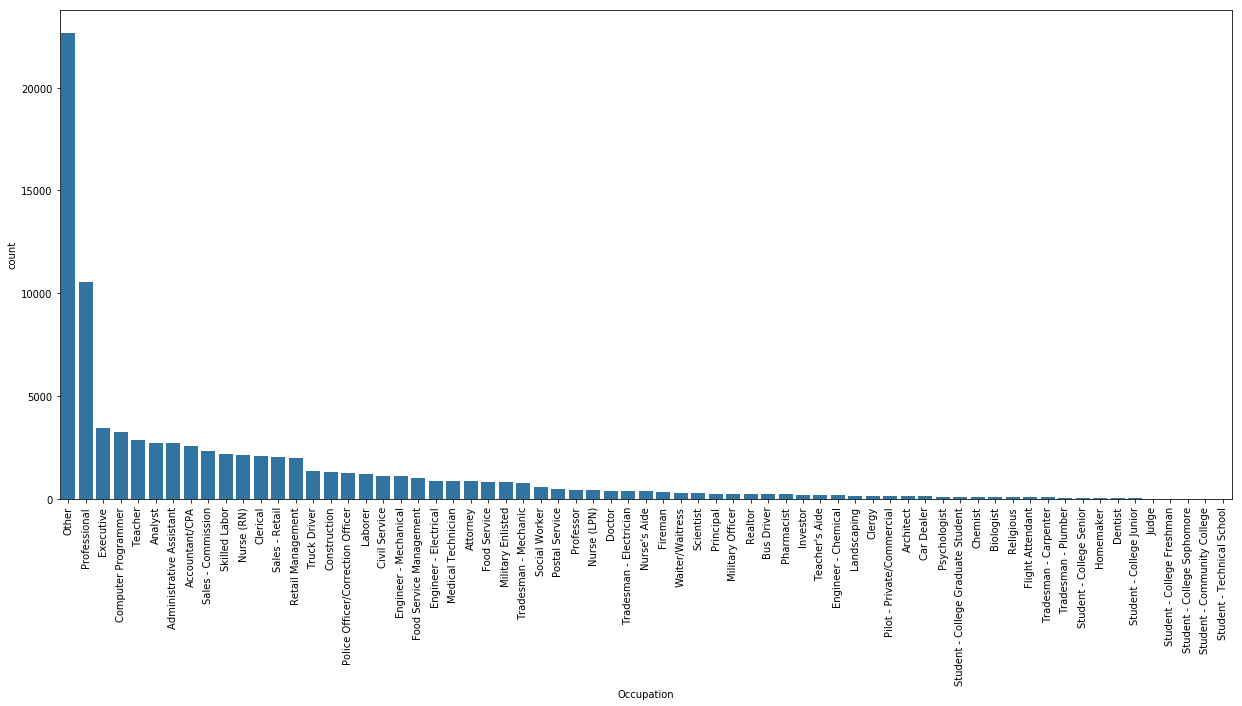

In [32]:
# Plot 'Occupation'
plt.figure(figsize = [21, 9])
sb.countplot(data = df_copy, x = 'Occupation', color = base_color, order = df_copy['Occupation'].value_counts().index)
plt.xticks(rotation=90);

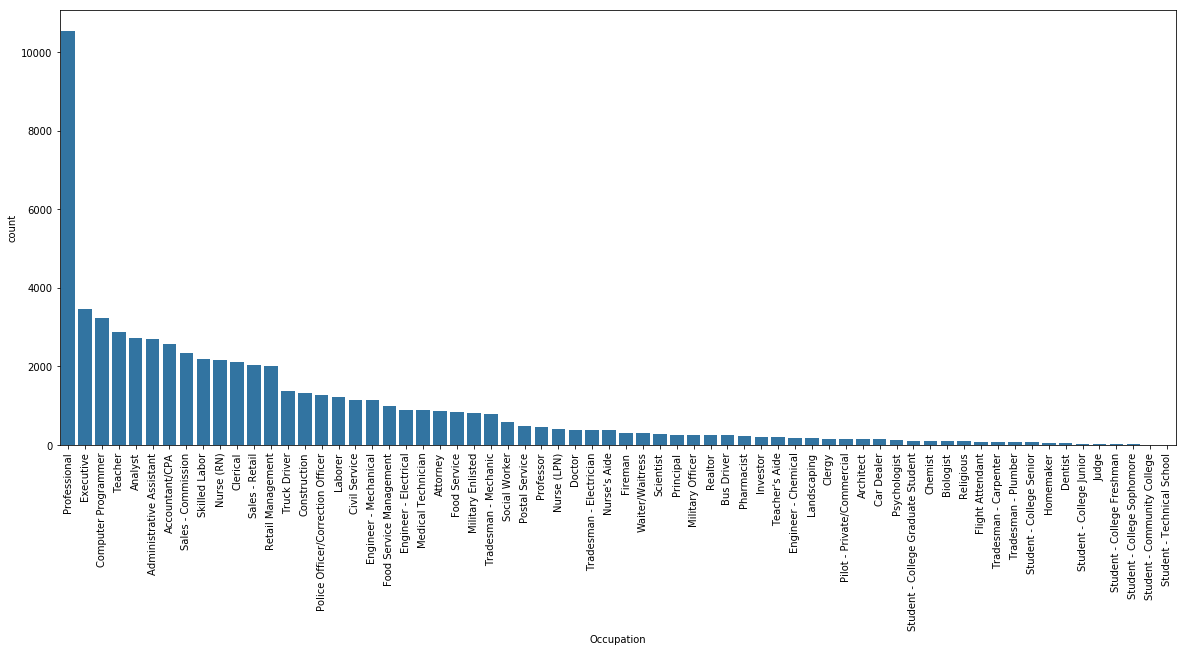

In [33]:
# Drop Occupation 'Other'
plt.figure(figsize = [20, 8])

sb.countplot(data = df_copy, x = 'Occupation',color = base_color, 
             order = df_copy['Occupation'].value_counts().iloc[1:].index)
plt.xticks(rotation = 90);

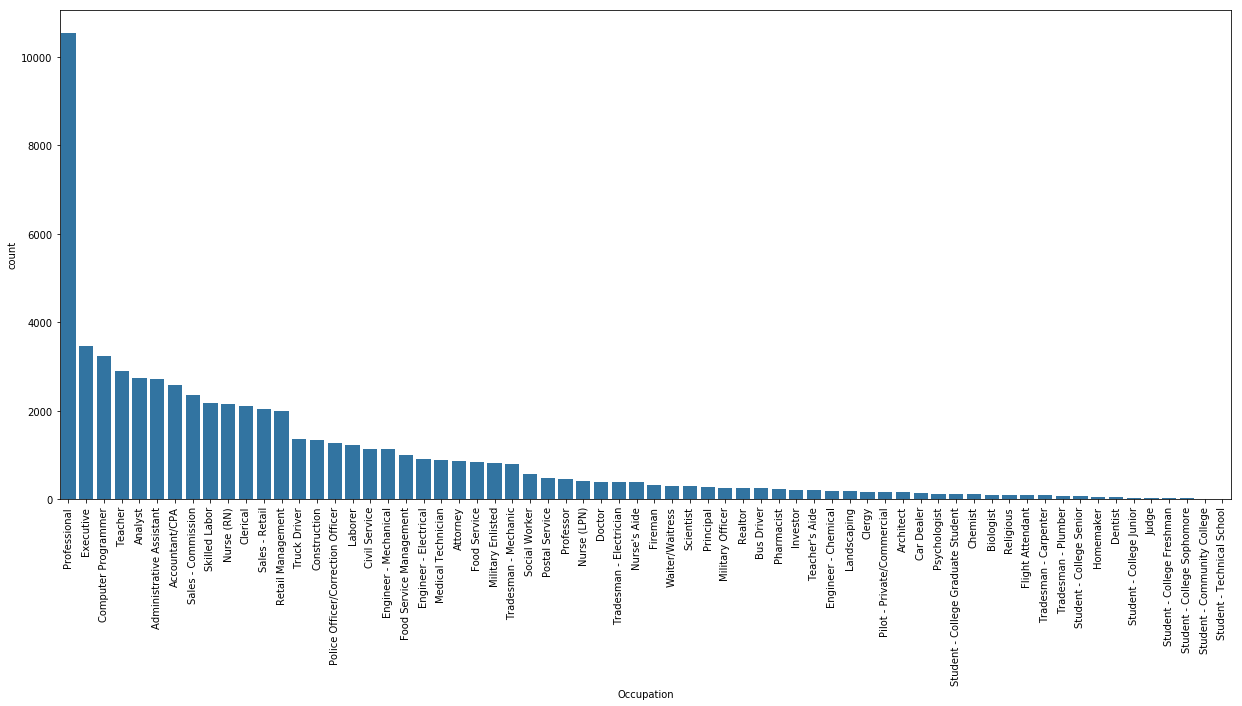

In [34]:
# Drop 'Other' from the plot
plt.figure(figsize = [21, 9])
sb.countplot(data = df_copy, x = 'Occupation', color = base_color, order = df_copy['Occupation'].value_counts().iloc[1:].index)
plt.xticks(rotation=90);

> Professionals get way more loans than other categories

### EmploymentStatus

> The employment status of the borrower at the time they posted the listing.

In [35]:
# Variable values
df_copy.EmploymentStatus.value_counts()

Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [36]:
# Check for NULL values
df_copy.EmploymentStatus.isna().sum()

0

In [37]:
# Categorical Variable
df_copy['EmploymentStatus'] = df_copy['EmploymentStatus'].astype('category')

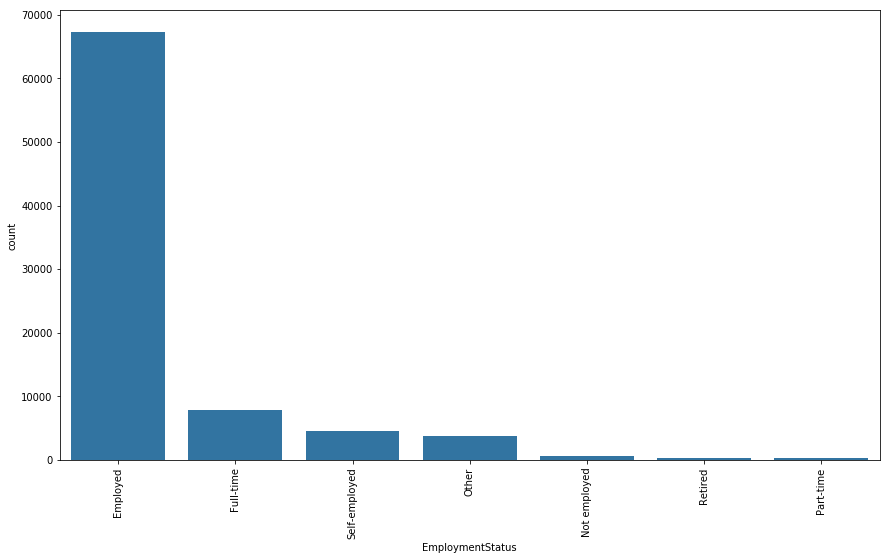

In [38]:
#Plot 
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'EmploymentStatus', color = base_color, order = df_copy['EmploymentStatus'].value_counts().index)
plt.xticks(rotation = 90);

> "Employed" get most loans. "Full-time" can also be considered "Employed". 

In [39]:
# Add new category combining 'Employed' and 'Full-time'
df_copy['EmploymentStatus'] = df_copy['EmploymentStatus'].cat.add_categories(['Employed / Full-time'])

In [40]:
# Change 'Full-time' to 'Employed / Full-time'
full_time = df_copy[df_copy['EmploymentStatus'] == 'Full-time'].index
df_copy.loc[full_time, 'EmploymentStatus'] = 'Employed / Full-time'

# Change 'Employed' to 'Employed / Full-time'
employed = df_copy[df_copy['EmploymentStatus'] == 'Employed'].index
df_copy.loc[employed, 'EmploymentStatus'] = 'Employed / Full-time'

In [41]:
# Drop consolidated categories
df_copy['EmploymentStatus'] = df_copy['EmploymentStatus'].cat.remove_categories(['Employed', 'Full-time'])

Index(['Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed',
       'Employed / Full-time'],
      dtype='object')


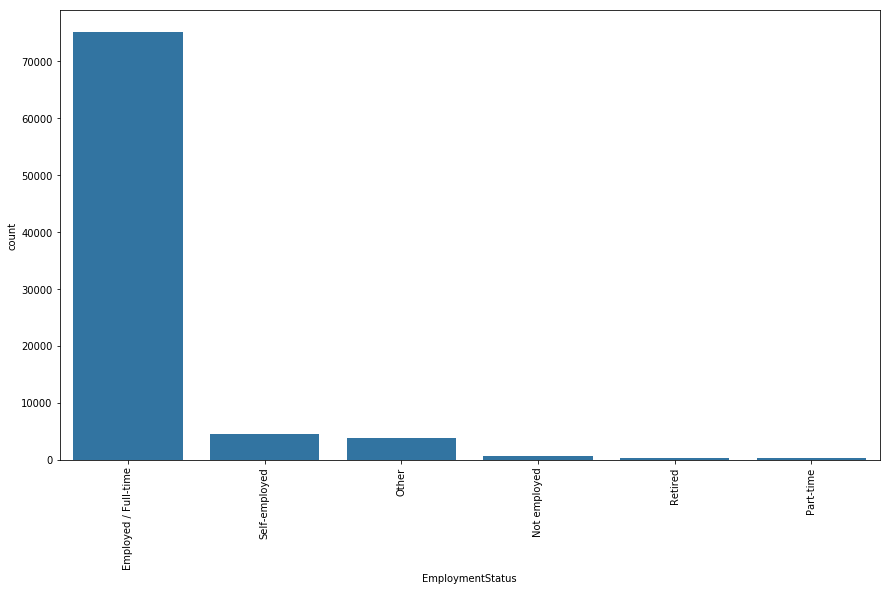

In [42]:
# Plot
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'EmploymentStatus', color = base_color, order = df_copy['EmploymentStatus'].value_counts().index)
plt.xticks(rotation = 90);

print(df_copy['EmploymentStatus'].cat.categories)

> There are more 'Employed / Full-time' and only a small proportion is "Self-employed". 

### IsBorrowerHomeowner

> A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

In [43]:
# Number of Trues and Falses
sorted_counts = df_copy.IsBorrowerHomeowner.value_counts().sort_values(ascending = False)
sorted_counts

True     44848
False    40005
Name: IsBorrowerHomeowner, dtype: int64

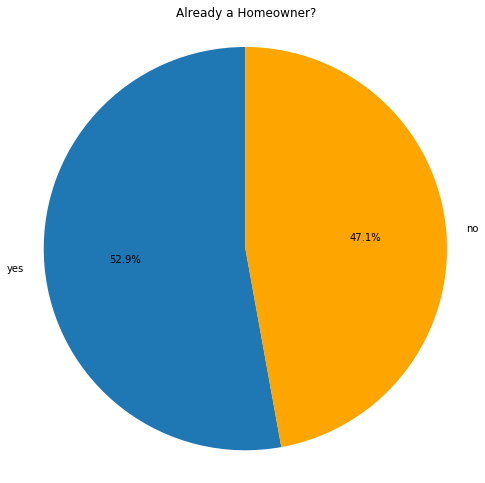

In [44]:
# Plot
plt.figure(figsize = [14.70, 8.27])
plt.pie(sorted_counts, labels = ['yes', 'no'], startangle = 90, autopct = '%1.1f%%', 
        counterclock = True, colors = [base_color, second_color]);
plt.axis('square')
plt.title('Already a Homeowner?');

In [45]:
# Categorical Variable
df_copy['IsBorrowerHomeowner'].replace({True: 'Yes', False: 'No'}, inplace = True)

df_copy.IsBorrowerHomeowner = pd.Categorical(df_copy.IsBorrowerHomeowner, categories = ['Yes', 'No'], ordered = True)
df_copy.IsBorrowerHomeowner.value_counts()

Yes    44848
No     40005
Name: IsBorrowerHomeowner, dtype: int64

> There isn't a significant difference in the percentage of homeowners vs. non-homeowners getting loans is almost the same.

### BorrowerState

> The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

In [46]:
# Variable values, Normalized as values are large otherwise
df_copy.BorrowerState.value_counts(normalize = True)

CA    0.126819
NY    0.068872
TX    0.066397
FL    0.063710
IL    0.050252
OH    0.039751
GA    0.039445
VA    0.032751
NJ    0.032114
PA    0.031560
MI    0.030900
NC    0.028744
MD    0.026410
WA    0.025373
MA    0.021578
MO    0.021131
CO    0.020376
MN    0.020211
IN    0.019469
TN    0.018125
WI    0.017925
CT    0.017583
AZ    0.015992
OR    0.014307
AL    0.013989
NV    0.012068
SC    0.011714
KY    0.010465
KS    0.010064
LA    0.009911
AR    0.009063
OK    0.008627
MS    0.007955
NE    0.006541
UT    0.006152
NH    0.005221
RI    0.004820
ID    0.004749
HI    0.004030
NM    0.003901
DC    0.003866
WV    0.003653
DE    0.003147
MT    0.002605
SD    0.002227
VT    0.002015
AK    0.001968
WY    0.001450
Name: BorrowerState, dtype: float64

In [47]:
# Missing Values
df_copy.BorrowerState.isnull().sum()

0

In [48]:
# Categorical variable
df_copy['BorrowerState'] = df_copy['BorrowerState'].astype('category')

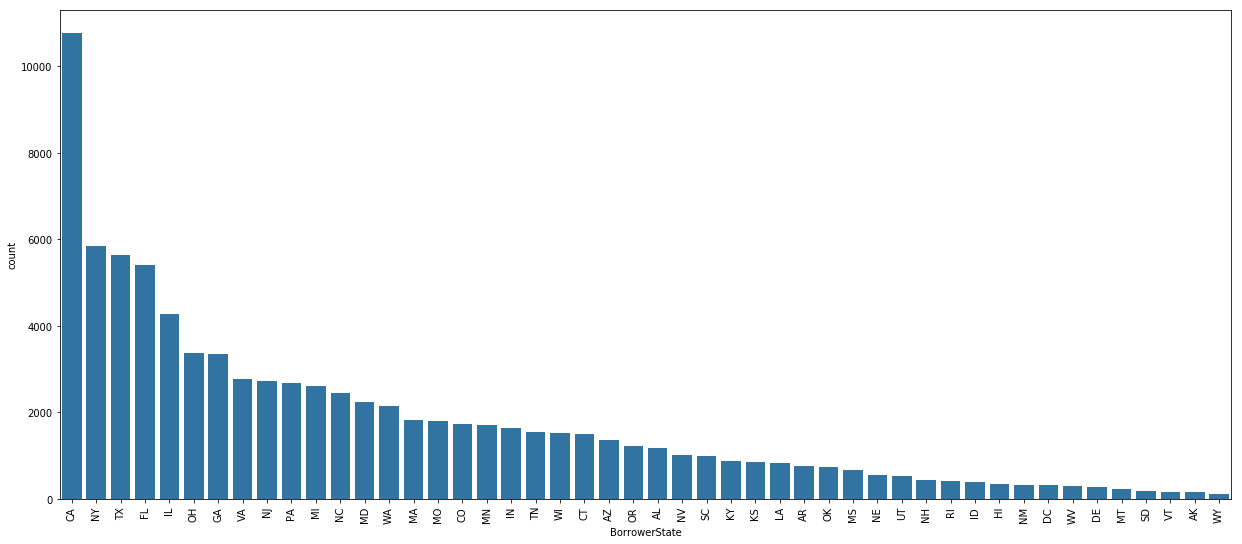

In [49]:
# Plot 'BorrowerState'
plt.figure(figsize = [21, 9])
sb.countplot(data = df_copy, x = 'BorrowerState', color = base_color, order = df_copy['BorrowerState'].value_counts().index)
plt.xticks(rotation = 90);

> California has the most count! Is also the richest state?!?!

### ListingCreationDate

> The date the listing was created.

In [50]:
# Information about variable values
df_copy.ListingCreationDate.describe()

count                             84853
unique                            83980
top       2013-10-02 17:20:16.550000000
freq                                  6
Name: ListingCreationDate, dtype: object

In [51]:
# Convert datatype to date/time
df_copy.ListingCreationDate =  pd.to_datetime(df_copy['ListingCreationDate'])

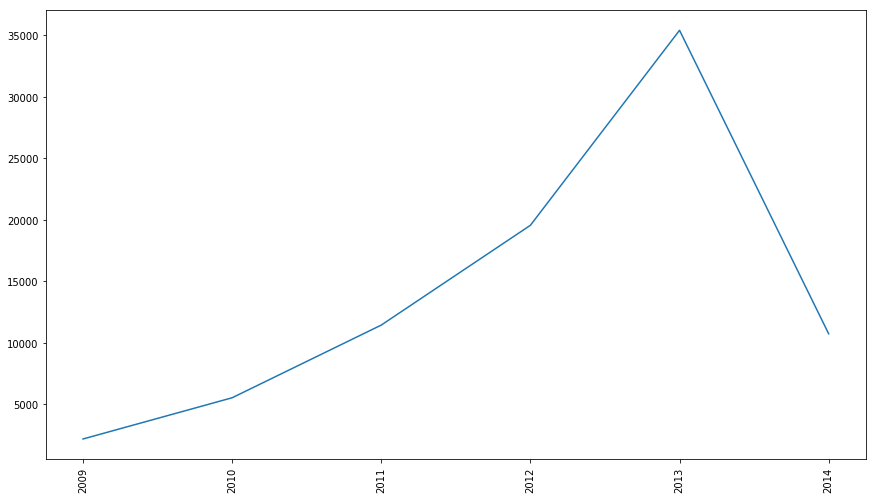

In [52]:
# Plot
plt.figure(figsize = [14.70, 8.27])
df_copy['ListingCreationDate'].dt.week
df_copy['ListingCreationDate'].dt.year
yearly_change = df_copy.groupby(df_copy['ListingCreationDate'].dt.year)['ListingCreationDate'].count().reset_index(name = 'YearlyCount')
plt.errorbar(data = yearly_change, x = 'ListingCreationDate', y = 'YearlyCount')
years = np.arange(2009, 2015, 1)
plt.xticks(years,rotation = 90);

In [53]:
df_copy.ListingCreationDate.max()

Timestamp('2014-03-10 12:20:53.760000')

> There is a clear upward trajectory of loans by year (post2009). Notice that we do not have full year data for 2014.

> Recall that we used CreditGrade pre-2009 and ProsperScore post July 2009

### LoanOriginationDate

> The date the loan was originated.

In [54]:
# Information about variable values
df_copy.LoanOriginationDate.describe()

count                   84853
unique                   1165
top       2014-01-22 00:00:00
freq                      491
Name: LoanOriginationDate, dtype: object

In [55]:
# Update the data type to Date/Time
df_copy.LoanOriginationDate =  pd.to_datetime(df_copy['LoanOriginationDate'])

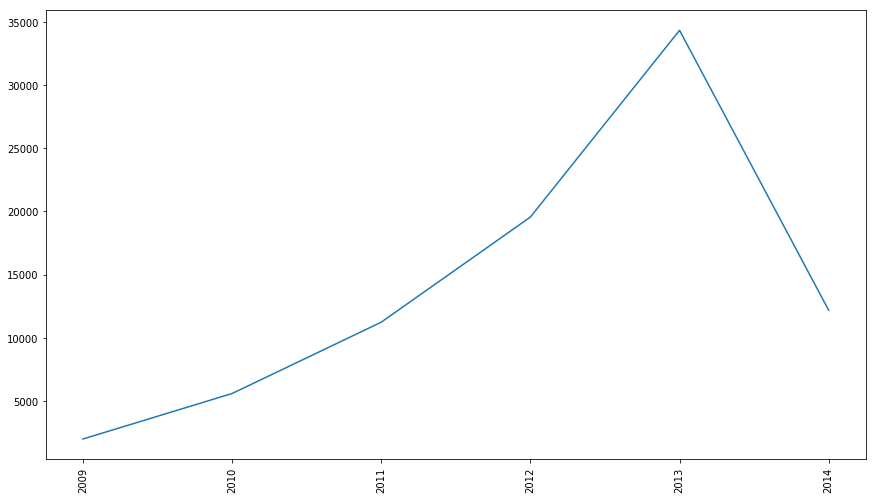

In [56]:
# Plot
plt.figure(figsize = [14.70, 8.27])
yearly_change = df_copy.groupby(df_copy['LoanOriginationDate'].dt.year)['LoanOriginationDate'].count().reset_index(name = 'YearlyCount')
plt.errorbar(data = yearly_change, x = 'LoanOriginationDate', y = 'YearlyCount')
years = np.arange(2009, 2015, 1)
plt.xticks(years,rotation = 90);

> Same trajectory as ListingCreationDate

### ListingCategory

> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [57]:
# Variable values, Normalized as values are large otherwise
df_copy['ListingCategory (numeric)'].value_counts(normalize = True)

1     0.626731
7     0.108635
2     0.080150
3     0.062437
6     0.026363
13    0.023523
15    0.017937
18    0.010430
14    0.010324
20    0.009086
19    0.009051
16    0.003583
5     0.003229
11    0.002557
8     0.002345
10    0.001072
9     0.001002
12    0.000695
17    0.000613
0     0.000236
Name: ListingCategory (numeric), dtype: float64

In [58]:
## Create a pandas array+series with (full) Listing Category to be used in place of (numeric) Codes
listing_category = np.array(['Not Available','Debt Consolidation','Home Improvement','Business',
                 'Personal Loan','Student Use','Auto','Other','Baby&Adoption',
                 'Boat','Cosmetic Procedure','Engagement Ring','Green Loans','Household Expenses',
                 'Large Purchases','Medical/Dental','Motorcycle','RV','Taxes',
                 'Vacation','Wedding Loans'])
listing_category_alpha = pd.Series(listing_category)

In [59]:
# Funtion to assign Listing Category (string) values to Listing Codes (numeric) in column 'ListingCategory'
def translate(x):
    category = listing_category_alpha[x]
    return category
# Create a new attribute 
df_copy['ListingCategory (Alpha)'] = df_copy['ListingCategory (numeric)'].apply(translate)

In [60]:
# Categorical variable
df_copy['ListingCategory (Alpha)'] = df_copy['ListingCategory (Alpha)'].astype('category')

In [61]:
# Variable values, Normalized for ListingCategory (Alpha)
df_copy['ListingCategory (Alpha)'].value_counts(normalize = True)

Debt Consolidation    0.626731
Other                 0.108635
Home Improvement      0.080150
Business              0.062437
Auto                  0.026363
Household Expenses    0.023523
Medical/Dental        0.017937
Taxes                 0.010430
Large Purchases       0.010324
Wedding Loans         0.009086
Vacation              0.009051
Motorcycle            0.003583
Student Use           0.003229
Engagement Ring       0.002557
Baby&Adoption         0.002345
Cosmetic Procedure    0.001072
Boat                  0.001002
Green Loans           0.000695
RV                    0.000613
Not Available         0.000236
Name: ListingCategory (Alpha), dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

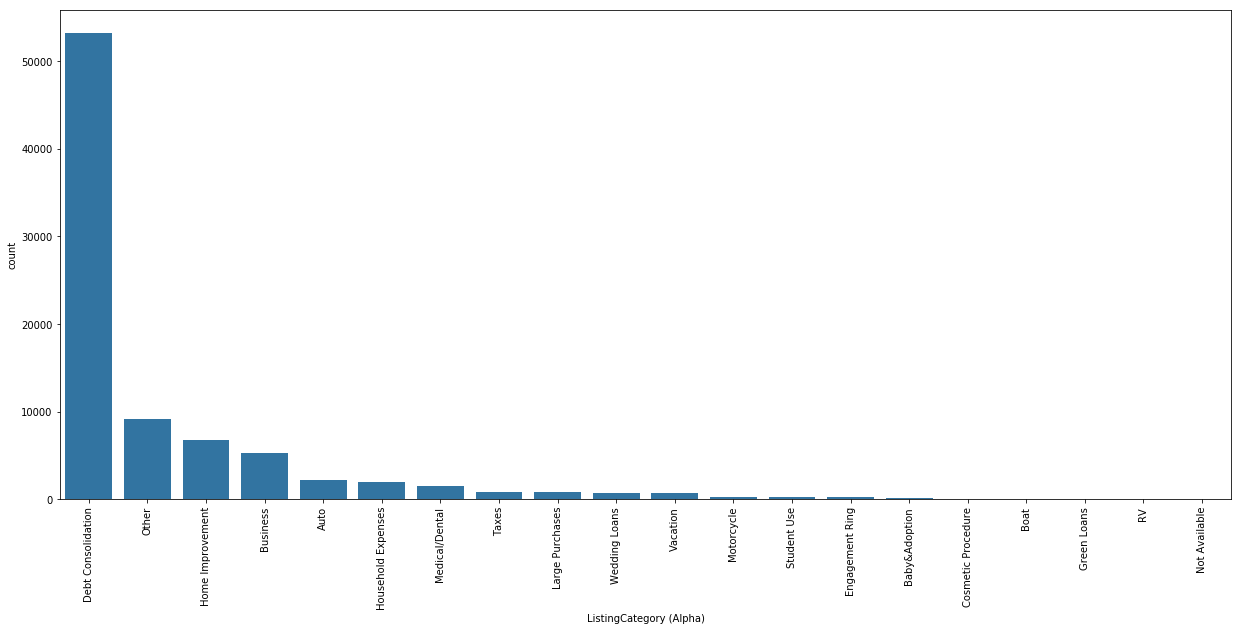

In [62]:
# Plot
plt.figure(figsize = [21, 9])
sb.countplot(data = df_copy, x = 'ListingCategory (Alpha)', color = base_color, order = df_copy['ListingCategory (Alpha)'].value_counts().index)
plt.xticks(rotation = 90)

> Makes sense that most loans are categorized as 'Debt Consolidation'.

> Merge 'Not Available' and 'Other'

In [63]:
# Change 'Not Available' to 'Other'
na = df_copy[df_copy['ListingCategory (Alpha)'] == 'Not Available'].index
df_copy.loc[na, 'ListingCategory (Alpha)'] = 'Other'

# Remove 'Not Available'
df_copy['ListingCategory (Alpha)'] = df_copy['ListingCategory (Alpha)'].cat.remove_categories(['Not Available'])

df_copy['ListingCategory (Alpha)'].cat.categories

Index(['Auto', 'Baby&Adoption', 'Boat', 'Business', 'Cosmetic Procedure',
       'Debt Consolidation', 'Engagement Ring', 'Green Loans',
       'Home Improvement', 'Household Expenses', 'Large Purchases',
       'Medical/Dental', 'Motorcycle', 'Other', 'RV', 'Student Use', 'Taxes',
       'Vacation', 'Wedding Loans'],
      dtype='object')

### BorrowerAPR

> The Borrower's Annual Percentage Rate (APR) for the loan.

In [64]:
# Remove loans with missing BorrowerAPR information. 
# (Since x-axis carries numerical values, we we do not get rid of NULLs, we will get 
# 'ValueError: range parameter must be finite' error.)
df_copy = df_copy[~df_copy.BorrowerAPR.isna()]

In [65]:
df_copy.BorrowerAPR.isna().sum()

0

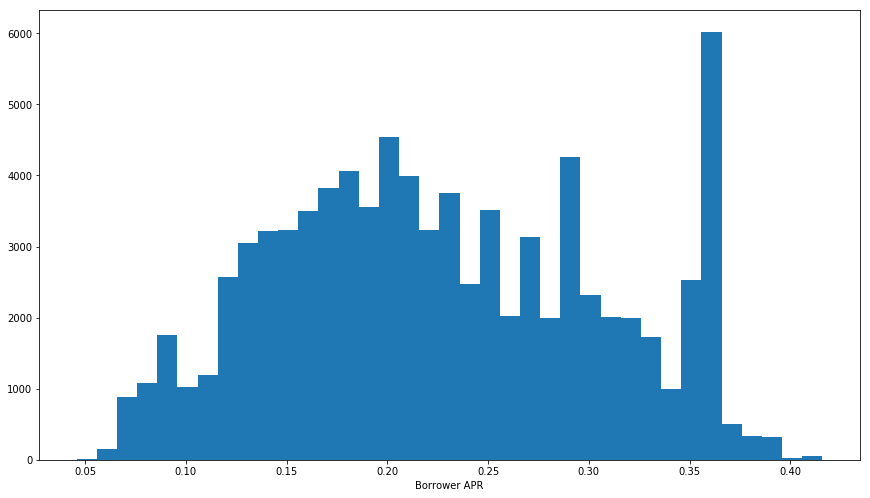

In [66]:
# Plot
plt.figure(figsize = [14.70, 8.27])
b_apr_bins = np.arange(df_copy.BorrowerAPR.min(), df_copy.BorrowerAPR.max(), 0.01)
plt.hist(data = df_copy, x = 'BorrowerAPR', bins = b_apr_bins);
plt.xlabel('Borrower APR');

> The distribution appears to be normally distributed, except for the 2 spikes between 30% and 40%. The median lies between 15% and 20%.

### BorrowerRate

> The Borrower's interest rate for this loan. 

In [67]:
# Remove loans with missing BorrowerRate information
df_copy = df_copy[~df_copy.BorrowerRate.isna()]

In [68]:
df_copy.BorrowerRate.isna().sum()

0

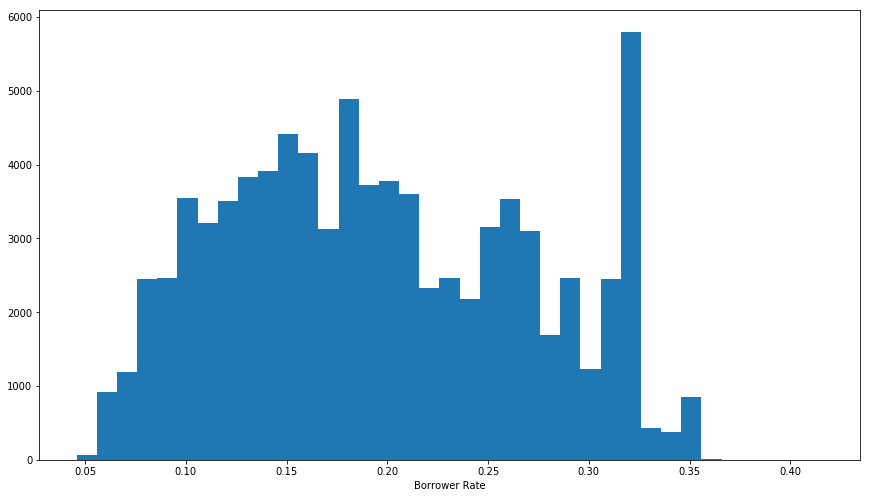

In [69]:
# Plot
plt.figure(figsize = [14.70, 8.27])
br_bins = np.arange(df_copy.BorrowerAPR.min(), df_copy.BorrowerAPR.max(), 0.01)
plt.hist(data = df_copy, x = 'BorrowerRate', bins = br_bins);
plt.xlabel('Borrower Rate');

> BorrowerRate has similar pattern as BorrowerAPR

### Term

> The length of the loan expressed in months.

In [70]:
# Some information about the variable
df_copy.Term.describe()

count    84853.000000
mean        42.486135
std         11.640346
min         12.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: Term, dtype: float64

In [71]:
df_copy.Term.isna().sum()

0

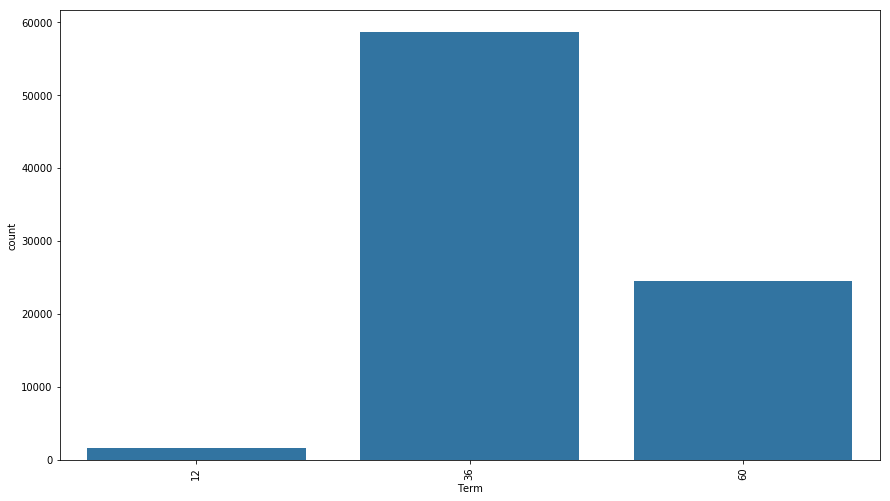

In [72]:
# Plot
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'Term', color = base_color)         
plt.xticks(rotation = 90);

> 36 month loan term is most common, followed by the 60 month term. 

### LoanStatus

> The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

In [73]:
# Column description
df_copy.LoanStatus.describe()

count       84853
unique         11
top       Current
freq        56576
Name: LoanStatus, dtype: object

In [74]:
# NULL values
df_copy.LoanStatus.isna().sum()

0

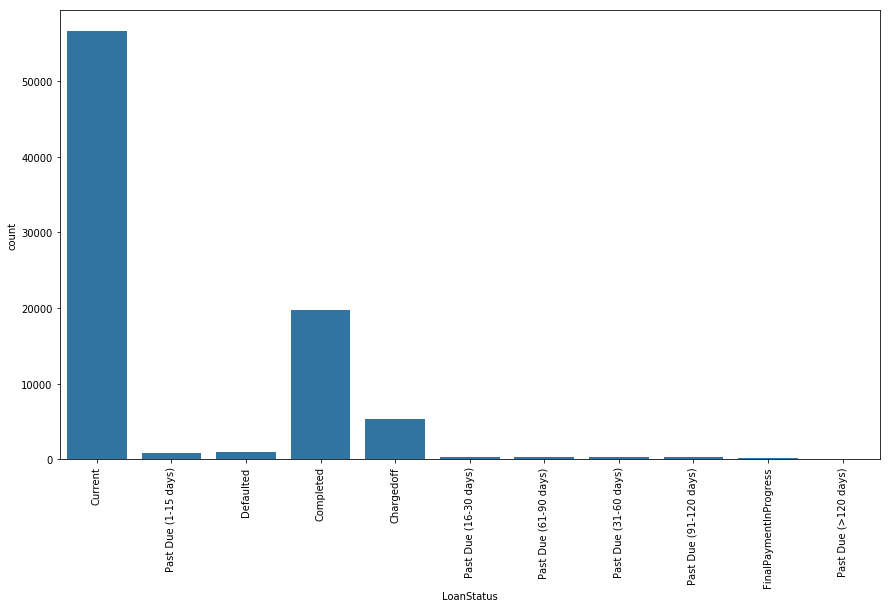

In [75]:
# Plot
plt.figure(figsize = [14.70, 8.27])
sb.countplot(data = df_copy, x = 'LoanStatus', color = base_color)         
plt.xticks(rotation = 90);

In [76]:
df_copy.LoanStatus.value_counts(normalize = True)

Current                   0.666753
Completed                 0.231742
Chargedoff                0.062885
Defaulted                 0.011844
Past Due (1-15 days)      0.009499
Past Due (31-60 days)     0.004278
Past Due (61-90 days)     0.003689
Past Due (91-120 days)    0.003583
Past Due (16-30 days)     0.003123
FinalPaymentInProgress    0.002416
Past Due (>120 days)      0.000189
Name: LoanStatus, dtype: float64

> Most loans are in good shape, either "Completed" or "Current". There are a few "Past Due" loans in various sub-categories.

> A charge-off is a form of write-off. This number is significant, which is a risk.

### DebtToIncomeRatio

> The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

In [77]:
# Column summary
df_copy.DebtToIncomeRatio.describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [78]:
print(df_copy.DebtToIncomeRatio.isna().sum(), df_copy[df_copy['DebtToIncomeRatio'] == 0.0]['ListingNumber'].count())

7296 6


> We will exclude NAs and consider the with value 0.0 as valid records

In [79]:
# Exclude NAs
df_copy = df_copy[df_copy.DebtToIncomeRatio.notnull()]

In [80]:
df_copy.DebtToIncomeRatio.isna().sum()

0

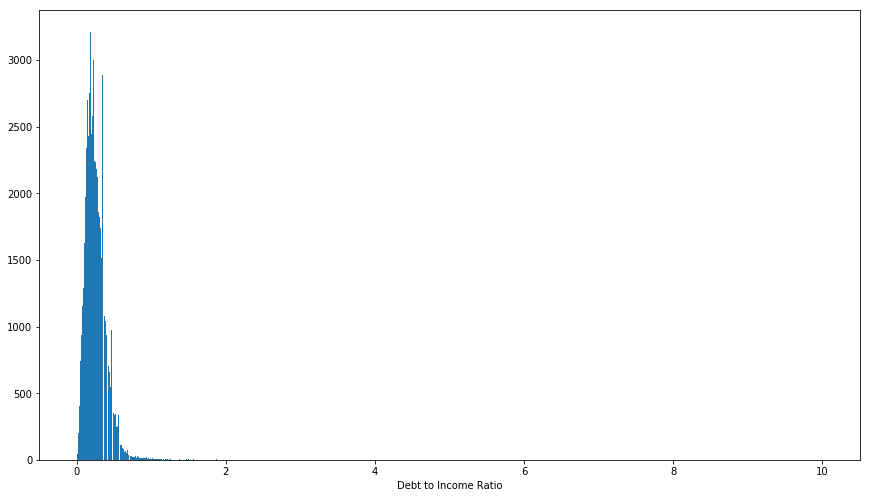

In [81]:
# Plot
plt.figure(figsize = [14.70, 8.27])
dir_bins = np.arange(df_copy.DebtToIncomeRatio.min(), df_copy.DebtToIncomeRatio.max()+0.0, 0.01)
plt.hist(data = df_copy, x = 'DebtToIncomeRatio', bins = dir_bins);
plt.xlabel('Debt to Income Ratio');

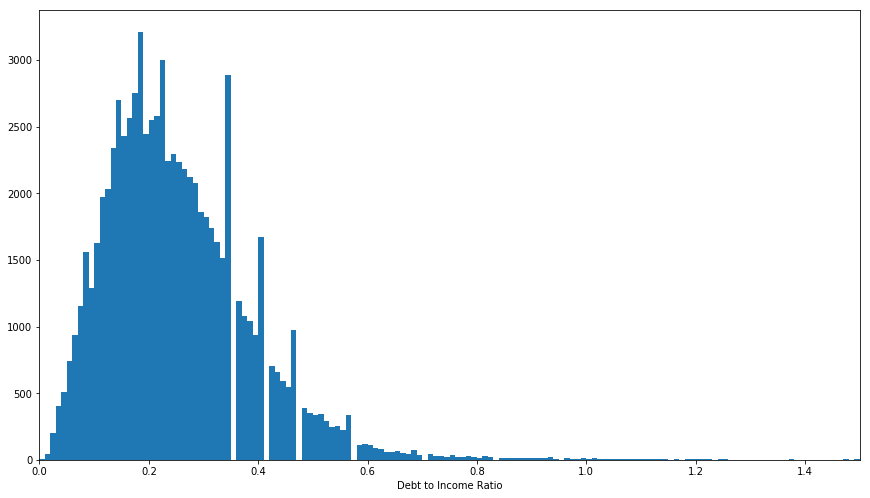

In [82]:
# Looks like, there are outliers in DebtToIncomeRatio
# Let's zoon into 0 and 1.5
plt.figure(figsize = [14.70, 8.27])
plt.hist(data = df_copy, x = 'DebtToIncomeRatio', bins = dir_bins);
plt.xlim(0, 1.5);
plt.xlabel('Debt to Income Ratio');

> There are clearly some outliers in DebtToIncomeRatio. 

> Between 0 and 1.5, the median is around 0.2.

> This variable definitely imapcts interest rate. We will examine this further in a bit.

In [83]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 82 columns):
ListingKey                             77557 non-null object
ListingNumber                          77557 non-null int64
ListingCreationDate                    77557 non-null datetime64[ns]
CreditGrade                            0 non-null category
Term                                   77557 non-null int64
LoanStatus                             77557 non-null object
ClosedDate                             23033 non-null object
BorrowerAPR                            77557 non-null float64
BorrowerRate                           77557 non-null float64
LenderYield                            77557 non-null float64
EstimatedEffectiveYield                77557 non-null float64
EstimatedLoss                          77557 non-null float64
EstimatedReturn                        77557 non-null float64
ProsperRating (numeric)                77557 non-null float64
ProsperRating (Alpha)    

In [84]:
# Is DebtToIncomeRatio = 0?
df_copy.query('DebtToIncomeRatio == 0')['ListingNumber'].count()

6

In [85]:
# Remove 0 values
df_copy = df_copy.query('DebtToIncomeRatio > 0')

> We should ideally consider log values for DebtToIncomeRatio

In [86]:
# Store log values
df_copy['DebtToIncomeRatio_ln'] = np.log10(df_copy['DebtToIncomeRatio'])
df_copy['DebtToIncomeRatio_ln'].describe()

count    77551.000000
mean        -0.670481
std          0.262030
min         -2.000000
25%         -0.823909
50%         -0.657577
75%         -0.494850
max          1.000434
Name: DebtToIncomeRatio_ln, dtype: float64

### StatedMonthlyIncome

> The monthly income the borrower stated at the time the listing was created.

In [87]:
# Summary
df_copy.StatedMonthlyIncome.describe().apply(lambda x: format(x, '.2f'))

count     77551.00
mean       5940.30
std        4000.82
min           0.25
25%        3533.33
50%        5000.00
75%        7166.67
max      158333.33
Name: StatedMonthlyIncome, dtype: object

In [88]:
# Look for 0's
df_copy[df_copy.StatedMonthlyIncome == 0]['ListingNumber'].count()

0

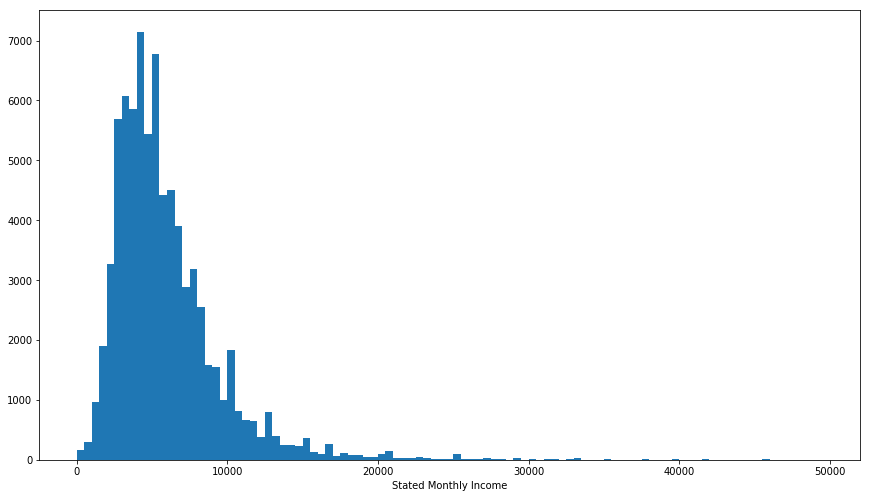

In [89]:
# Plot
plt.figure(figsize = [14.70, 8.27])
smi_bins = np.arange(0, 50000, 500)
plt.hist(data = df_copy, x = 'StatedMonthlyIncome', bins = smi_bins)
plt.xlabel('Stated Monthly Income');

> The distribution for StatedMonthlyIncome is severely right skewed.

In [90]:
# # of 0's?
df_copy.query('StatedMonthlyIncome == 0')['ListingNumber'].count()

0

In [91]:
# Store log values
df_copy['StatedMonthlyIncome_ln'] = np.log10(df_copy['StatedMonthlyIncome'])
df_copy['StatedMonthlyIncome_ln'].describe()

count    77551.000000
mean         3.702245
std          0.257954
min         -0.602060
25%          3.548185
50%          3.698970
75%          3.855317
max          5.199572
Name: StatedMonthlyIncome_ln, dtype: float64

### LoanOriginalAmount

> The origination amount of the loan.

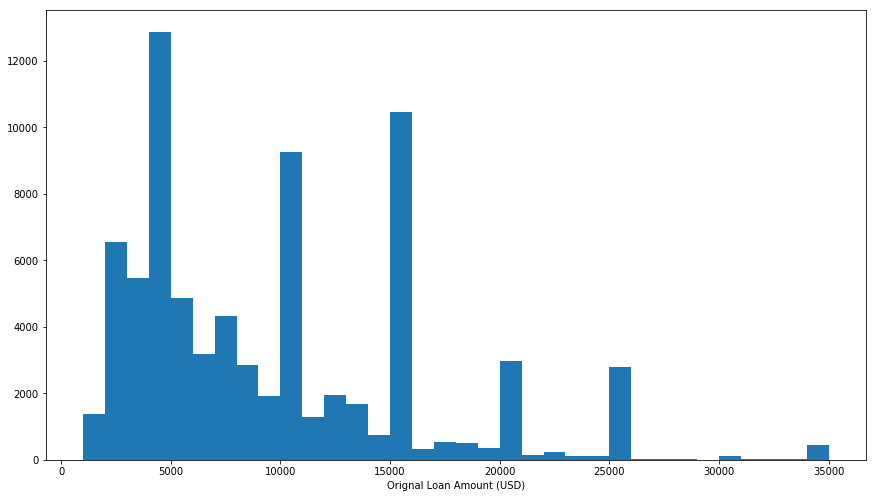

In [92]:
# Plot
plt.figure(figsize = [14.70, 8.27])
ola_bins = np.arange(df_copy.LoanOriginalAmount.min(), df_copy.LoanOriginalAmount.max()+1e3, 1e3)
plt.hist(data = df_copy, x = 'LoanOriginalAmount', bins = ola_bins);
plt.xlabel('Orignal Loan Amount (USD)');

> The distribution is left skewed, implying most loans were less than 10,000 USD. The median is around the 5,000 USD, but there are large spikes at 10,000 USD, 15,000 USD, 20,000 USD and 25,000 USD.

> Few people take loans of over 25,000 USD.

### CreditScoreRange's

> CreditScoreRangeLower - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

> CreditScoreRangeLower - The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

In [93]:
# Drop NULLs
df_copy = df_copy[~df_copy.CreditScoreRangeLower.isna()]

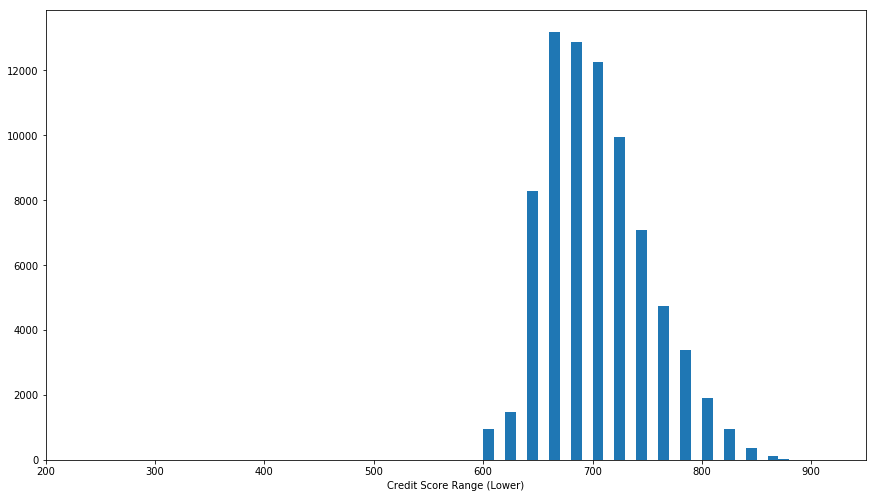

In [94]:
# Plot
plt.figure(figsize = [14.70, 8.27])
csr_lower_bins = np.arange(df_copy.CreditScoreRangeLower.min(), df_copy.CreditScoreRangeLower.max()+10, 10)
plt.hist(data = df_copy, x = 'CreditScoreRangeLower', bins = csr_lower_bins);
plt.xlim(200, 950);
plt.xlabel('Credit Score Range (Lower)');

In [95]:
# Drop NULLs
df_copy = df_copy[~df_copy.CreditScoreRangeUpper.isna()]

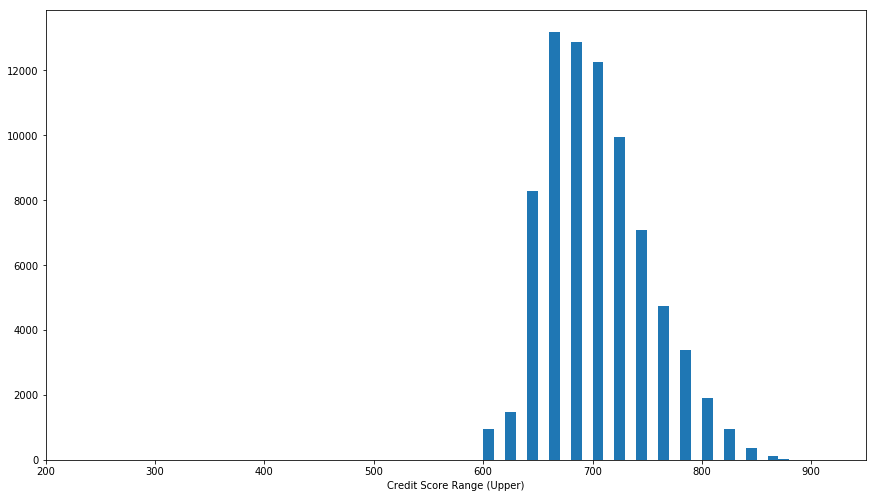

In [96]:
# Plot
plt.figure(figsize = [14.70, 8.27])
csr_upper_bins = np.arange(df_copy.CreditScoreRangeLower.min(), df_copy.CreditScoreRangeLower.max()+10, 10)
plt.hist(data = df_copy, x = 'CreditScoreRangeLower', bins = csr_upper_bins);
plt.xlim(200, 950);
plt.xlabel('Credit Score Range (Upper)');

> Both Credit Score Ranges have similar distribution of scores. Since, FICO scores usually range from 250-900, the x-axis was limited to those ranges. Most people in the dataset had a score of around the 700 value.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the variables had expected distributions,.

> The ProsperScore, BorrowerAPR, BorrowerRate and DebtToIncomeRatio had some spikes in the plot.

> The DebtToIncomeRatio also contained extreme outliers for which we zoomed into the x-axis to show only the ratio between 0 and 1.5.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For DebtToIncomeRatio, we zoomed into only the values from 0 and 1.5.

> For variables - BorrowerAPR, BorrowerRate, DebtToIncomeRatio, StateMonthlyIncome, CreditScorerange's - we got rid of 0/NULL/NA values to get clean plots.

## Bivariate Exploration

> We want to now see how the different parameters affect the interest rate.

> Many parameters above showed similar behaviour, for example, BorrowerAPR and BorrowerRate. So we will look and a subset of these parameters for further analyses.

In [97]:
# Numeric Variables
numeric_variables = ['BorrowerAPR', 'DebtToIncomeRatio_ln', 'StatedMonthlyIncome_ln', 'LoanOriginalAmount']

In [98]:
# categorical_variables = ['Term', 'ProsperRating (Alpha)']

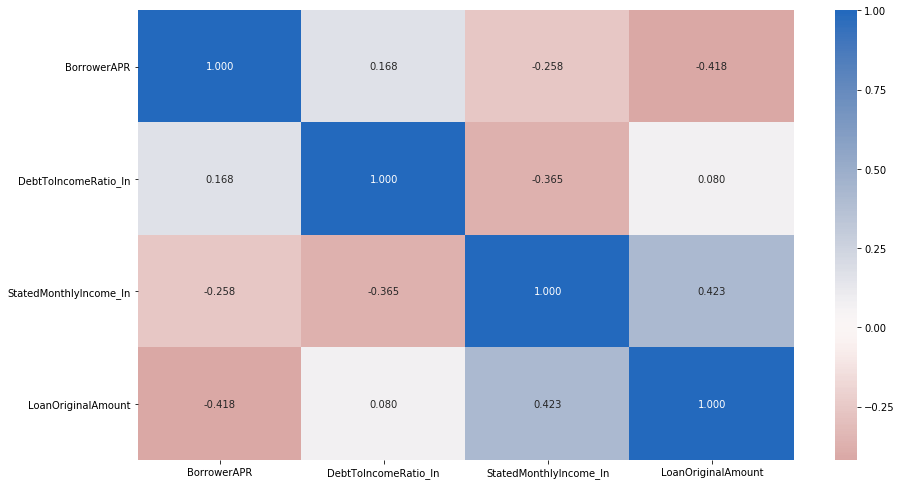

In [99]:
# Correlation plot for numeric parameters
plt.figure(figsize = [14.70, 8.27])
sb.heatmap(df_copy[numeric_variables].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

In [100]:
# Plot matrix: sample 7000 so that plots are clearer and they render faster
samples = np.random.choice(df_copy.shape[0], 7000, replace = False)
pairplot_sample = df_copy.iloc[samples,:]

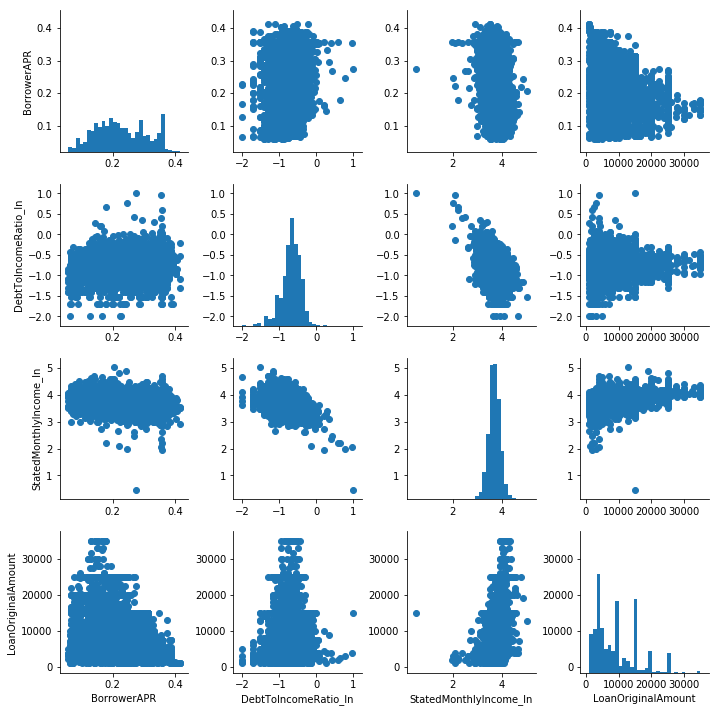

In [101]:
# Pairplot
plt.figure(figsize = [14.70, 8.27])
g = sb.PairGrid(data = pairplot_sample, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 30);
g.map_offdiag(plt.scatter);

> The correlation matrix and the pairplot show some good candidates for futher comparison. We will continue to look for answers to our question.

### What factors determine interest rates for loans?

> We will check the parameters that intuitively make sense to compare with each other.

### BorrowerAPR vs. ProsperRating (Alpha)

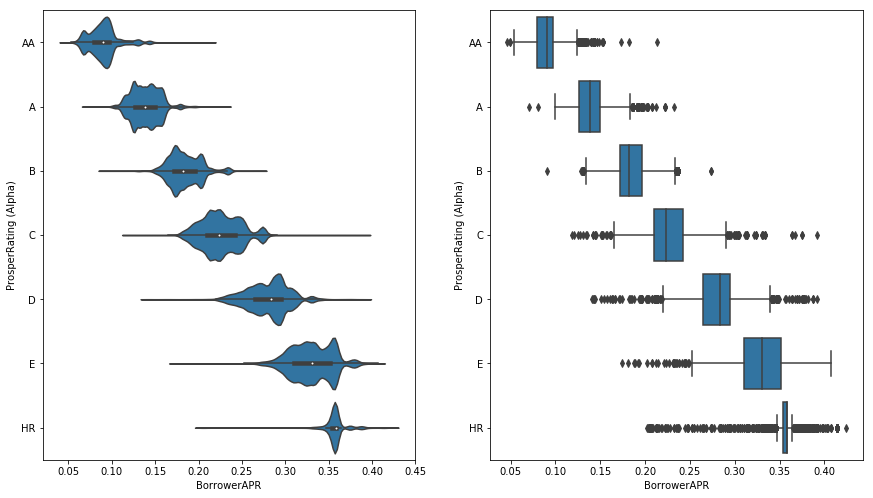

In [102]:
# Plot
plt.figure(figsize = [14.70, 8.27])

# Left plot: Violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_copy, y = 'ProsperRating (Alpha)', x = 'BorrowerAPR', color = base_color, scale='width')

# Right plot: Box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_copy, y = 'ProsperRating (Alpha)', x = 'BorrowerAPR', color = base_color);
plt.ylim(ax1.get_ylim());

> The spread in each category is large.

> - For category AA, there are many outliers to the right 
> - In categories A, C, and D, there are outliers in both directions 
> - E has outliers to the left 
> - Category HR has a relatively small Interquartile Range (IQR) and many outliers on left and right

### BorrowerAPR vs. DebtToIncomeRatio

In [103]:
df_copy.DebtToIncomeRatio.isna().sum()

0

In [104]:
df_copy.BorrowerAPR.isna().sum()

0

In [105]:
# Attempted creating a scatter plot as follows, which took a very long time. Unsure if it gets stuck in a look.
#g = sb.JointGrid(data = df_copy, x = 'BorrowerAPR', y = 'DebtToIncomeRatio')
#g.plot_joint(plt.scatter)
#g.plot_marginals(sb.rugplot, height = 0.25);

# Moving on...

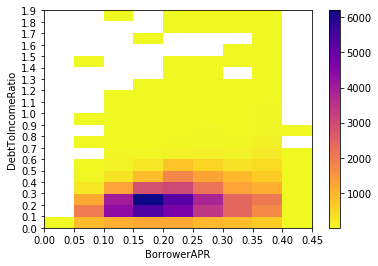

In [106]:
# Plot heat map
fig, ax = plt.subplots(1,1) 

bins_x = np.arange(0.0, 0.5, 0.05)
bins_y = np.arange(0.0, 2.0, 0.1)
img = ax.hist2d(data = df_copy, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', bins = [bins_x, bins_y], cmap = 'plasma_r', cmin = 0.5 )

plt.xlabel('BorrowerAPR')
plt.ylabel('DebtToIncomeRatio');

# Set number of ticks for x-axis
ax.set_xticks(bins_x)
ax.set_yticks(bins_y)
plt.colorbar(img[3], ax=ax);

> Most of the values sre concentrated in the grid [0.10, 0.4] and [0.10, 0,25]. 

### BorrowerAPR vs Term

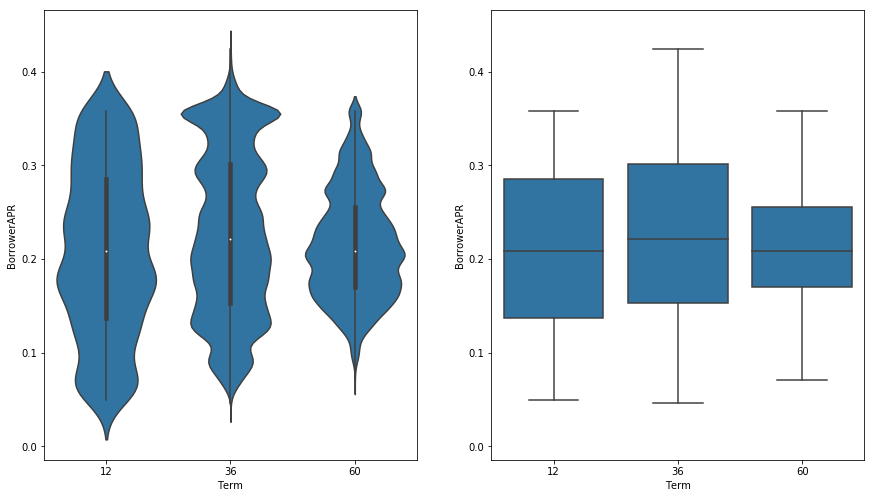

In [107]:
# Plot
plt.figure(figsize = [14.70, 8.27])

# Left plot: Violin plot
plt.subplot(1, 2, 1);
ax1 = sb.violinplot(data = df_copy, x = 'Term', y = 'BorrowerAPR', color = base_color, scale='width');

# Center plot: Box plot
plt.subplot(1, 2, 2);
sb.boxplot(data = df_copy, x = 'Term', y = 'BorrowerAPR', color = base_color);
plt.ylim(ax1.get_ylim());

> During Univariate Analysis, we saw that 12 month term is rarely used, but it has a lower rate as per the distribution.

> All 3 terms give a wide range of of rates. 

> - 36 month term seems to be multimodal and 60 month term right skewed. 
> - In 36 month term, we see 3rd modality, which looks very similar to the concentration we saw in DebtToIncomeRatio between 0.35 and 0.37.
> - The Medians are close to each other.
> - The range for 60 month term is smaller.

### BorrowerAPR vs. StatedMonthyIncome

In [108]:
df_copy.StatedMonthlyIncome_ln.describe()

count    77551.000000
mean         3.702245
std          0.257954
min         -0.602060
25%          3.548185
50%          3.698970
75%          3.855317
max          5.199572
Name: StatedMonthlyIncome_ln, dtype: float64

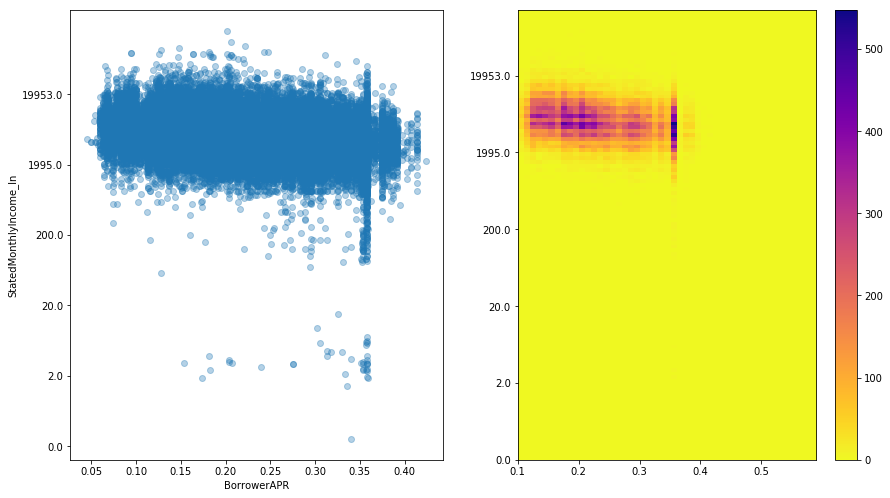

In [109]:
# Plot
plt.figure(figsize = [14.70, 8.27])
x = np.arange(0.1, 0.6, 0.01)

# Left plot: Scatterplot with jitter and transparency
plt.subplot(1, 2, 1)
ax = sb.regplot(data = df_copy, x = 'BorrowerAPR', y = 'StatedMonthlyIncome_ln', fit_reg = False,
           x_jitter = 0.0, y_jitter = 0.0, scatter_kws = {'alpha' : 1/3})

# Right plot: Heat map with bin edges between values
# ln10 scale
a = np.arange(-.7, 5.2, 1)
b = 10 ** a
b = np.around(b, decimals=0, out=None)
plt.yticks(a,b)
plt.subplot(1, 2, 2)
bins_x = np.arange(0.1, 0.6, 0.01)
bins_y = np.arange(-.7, 5.2, .05)
plt.hist2d(data = df_copy, x = 'BorrowerAPR', y = 'StatedMonthlyIncome_ln',
           bins = [bins_x, bins_y], cmap = 'plasma_r')
plt.yticks(a,b)
plt.colorbar();

> On the log scale that the most frequent area is 1900 to 20000 for StatedMonthlyIncome. The APR range varies from 5% to 40%. 

> Having a high monthly income is not an indication fot getting better rates.

### BorrowerAPR vs. LoanOriginalAmount

In [110]:
df_copy.LoanOriginalAmount.describe()

count    77551.000000
mean      9269.760570
std       6398.403701
min       1000.000000
25%       4000.000000
50%       8000.000000
75%      14500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

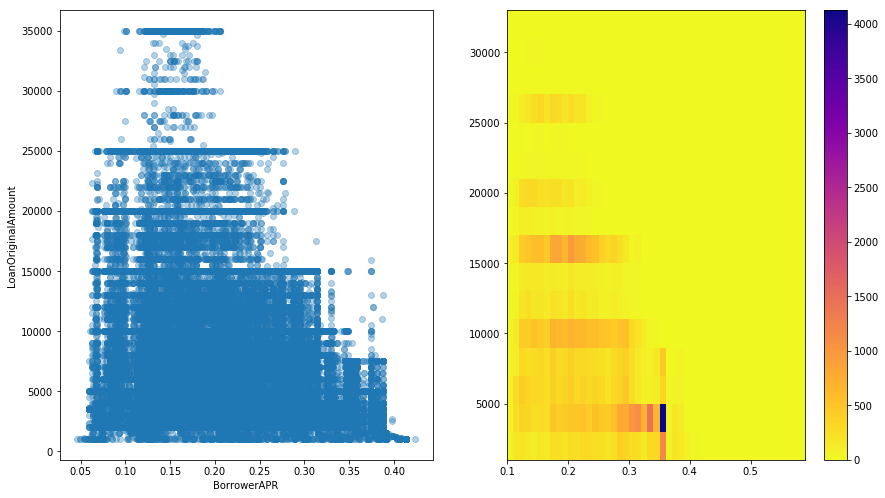

In [111]:
# Plot
plt.figure(figsize = [14.70, 8.27])
x = np.arange(0.1, 0.6, 0.01)

# Left plot: Scatterplot with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = df_copy, x = 'BorrowerAPR', y = 'LoanOriginalAmount', fit_reg = False,
           x_jitter = 0.0, y_jitter = 0.0, scatter_kws = {'alpha' : 1/3})

# Right plot: Heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.1, 0.6, 0.01)
bins_y = np.arange(1000, 35000, 2000)
plt.hist2d(data = df_copy, x = 'BorrowerAPR', y = 'LoanOriginalAmount',
           bins = [bins_x, bins_y], cmap = 'plasma_r')
plt.colorbar();

> The range of rates narrows as the loan amount increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - BorrowerAPR vs. ProsperRating: The distributions climb with the decrease in APR. These distributions are bi- or multimodal. The spread in each categoy is large. For category AA, there are outliers to the right. In categories A, C, and D, there are outliers in both directions. Category E has outliers to the left. Category HR has a relatively small Interquartile Range (IQR) and many outliers on left and right.
> - BorrowerAPR vs. DebtToIncomeRatio: We see a very weak linear relationship here. Strangely, there is a nearly vertical line between 0.35 and 0.37 along full range of DebtToIncomeRatio. Majority of the values are concentrated in [0.1,  0.4] and [0.10, 0.25]. There is a somewhat upward trend in the concentration.
> - BorrowerAPR vs Term: From Univariate Analysis, we know that 12 month term is least used/granted, but they have lower rates as seen in the distributions. 36 month term is multimodal and 60 month term is skewed right. All 3 terms have a wide range of APR values. 36 month term has 3rd modality, which looks similar to DebtToIncomeration between 0.35 and 0.37. The Medians are close to each other. The range for 60 month term is smaller.
> - BorrowerAPR vs. StatedMonthyIncome: On the log scale, the most frequent area is 1900 to 20000 for Stated MonthlyIncome. The APR range varies from 5% to 40%. This means that having a high monthly income is not an indication fot getting better rates.
> - BorrowerAPR vs. OriginalLoanAmount: APR spread decreases and loan amount increases.

> The most pronounced relationship is between ProsperRating (Alpha) and BorrowerAPR. Other factors play a weaker role in determining BorrowerAPR, nonetheless, they cannot be neglected. The crux is that people with better ProsperRating get lower interest rates on their loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Surprisingly, DebtToIncomeRatio did not have a meaningful correlation to interest rates. Other column behaviors were as expected. I did not explore all the features in the dataset, but I thing it is a good idea to explore some more like IncomeRange, MonthlyPayment, EstimatedLoss, etc.

## Multivariate Exploration

> Continuing our investigation, I want to further explore how ProsperRating (Alpha) and Term affect the relationship between BorrowerAPR and , and StatedMonthlyIncome and OriginalLoanAmount.

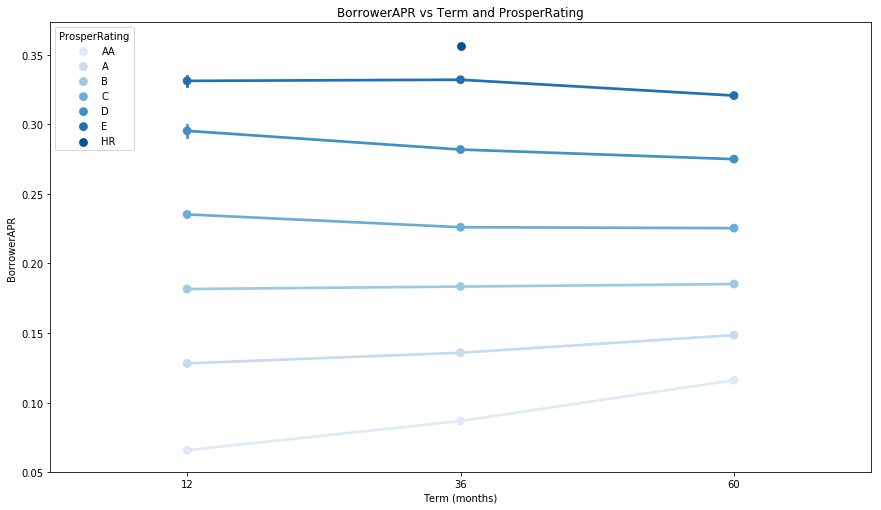

In [112]:
# Plot BorrowerAPR vs Term and ProsperRating (Alpha)
plt.figure(figsize = [14.70, 8.27])

ax = sb.pointplot(data = df_copy, x = 'Term', y = 'BorrowerAPR', hue = 'ProsperRating (Alpha)',
                   palette = 'Blues');
plt.legend(loc = 2, title = 'ProsperRating');
plt.xlabel('Term (months)');
plt.title('BorrowerAPR vs Term and ProsperRating', color = 'black');


> As ProsperRating gets better HR>AA, the BorrowerAPR decreases. 

> Generally speaking, for ProsperRating HR>C, BorrowerAPR generally decreses with increase in length of loan Term. This reverses as we go from ProsperRating B>AA

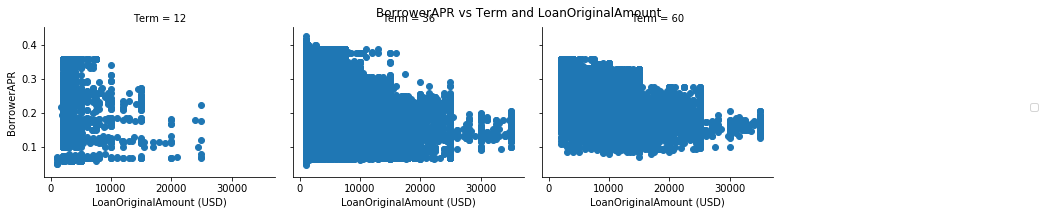

In [113]:
# Plot BorrowerAPR vs Term and LoanOriginalAmount
plt.figure(figsize = [14.70, 8.27])
g = sb.FacetGrid(data = df_copy, aspect = 1.2, col = 'Term', col_wrap = 4)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR').set_axis_labels("LoanOriginalAmount (USD)", "BorrowerAPR");
g.fig.suptitle('BorrowerAPR vs Term and LoanOriginalAmount', color = 'black');
g.add_legend();

> 36-month Term has most number of loans, followed by 60-month and 12-month Terms. 

> There are more loans for lower LoanOriginalAmount in all the terms.

> As LoanOriginalAmount increases BorrowerAPR decreases.

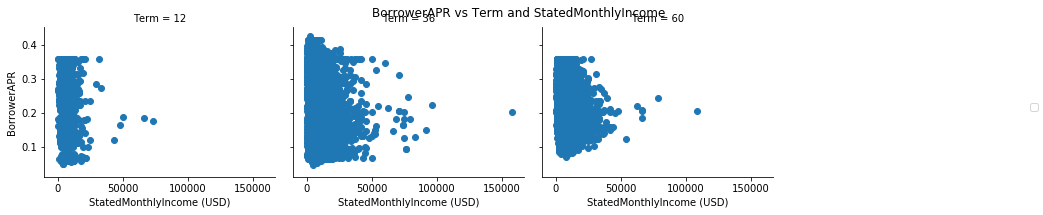

In [114]:
# Plot BorrowerAPR vs Term and StatedMonthlyIncome
plt.figure(figsize = [14.70, 8.27])
g = sb.FacetGrid(data = df_copy, aspect = 1.2, col = 'Term', col_wrap = 4)
g.map(plt.scatter, 'StatedMonthlyIncome', 'BorrowerAPR').set_axis_labels("StatedMonthlyIncome (USD)", "BorrowerAPR");
plt.suptitle('BorrowerAPR vs Term and StatedMonthlyIncome', color = 'black');
g.add_legend();

> Generally speaking, higher the StatedMonthlyIncome, lower the BorrowerAPR.

> No new observations seen, other than whats noted!

In [ ]:
# Plot all PropsperRating vs. (LoanOriginalAmount, StatedMonthlyIncome and BorrowerAPR)
plt.figure(figsize = [14.70, 8.27])

# Plot matrix: sample 7000 so that plots are clearer and they render faster
samples = np.random.choice(df_copy.shape[0], 7000, replace = False)
pairplot_sample = df_copy.iloc[samples,:]

# Plot
g = sb.PairGrid(data = pairplot_sample, 
                x_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome','BorrowerAPR'],
                y_vars = ['ProsperRating (Alpha)'], 
                size = 3, aspect = 1.5, dropna = True)

g.map(sb.violinplot,  color = base_color, saturation = 2);
g.axes[0,0].set_xlim(-1000,20000)
g.axes[0,1].set_xlim(-0.2,1)
g.fig.suptitle('ProsperRating/IncomeRange vs. LoanMount, APR and Estimated Loss', fontdict={'fontsize': 18}, color = 'black');
g.fig.subplots_adjust(top = 0.9)


for i in np.arange(g.axes.shape[0]):
    for j in np.arange(g.axes.shape[1]):
        g.axes[i,j].grid(False)

> Better ProsperRating means better BorrowerAPR

> Better ProsperRating means higher loan amounts are approved

> There is no significant relationship between StateMonthlyIncome and ProsperRating (Alpha). People in any income range can have good as well poor ProsperRating

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> On further investigation, it has been observed:
> - As ProsperRating gets better HR>AA, the BorrowerAPR decreases. 
> - Generally speaking, for ProsperRating HR>C, BorrowerAPR generally decreses with increase in length of loan Term. This reverses as we go from ProsperRating B>AA.
> - 36-month Term has most number of loans, followed by 60-month and 12-month Terms.
> - There are more loans for lower LoanOriginalAmount in all the terms.
> - As LoanOriginalAmount increases BorrowerAPR decreases.tween BorrowerAPR and LoanOriginalAmount. But as LoanOriginalAmount increases BorrowerAPR decreases.
> - Higher the StatedMonthlyIncome, lower the BorrowerAPR.
> - Better ProsperRating means better BorrowerAPR
> - Better ProsperRating means higher loan amounts are approved

### Were there any interesting or surprising interactions between features?

> The most surprising thing I observed throughout the investigation was how individual variables sometimes do not explain how Interest Rates are affected by any of them, but as you start studing effects of a combination of those, you see interesting relationships between these variables.

> A surprising interaction is that BorrowerAPR decreases with the increase of loan Term for people with HR-C raings. But for people with B-AA ratings, BorrowerAPR increases with loan Term.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

<a id='conclusions'></a>

> Create .html or .pdf version of this notebook in the workspace.

In [116]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

0